<a href="https://colab.research.google.com/github/iamMchoi/MNIST/blob/master/MNIST_DNNwithTf_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers

import matplotlib.pyplot as plt

## Data

In [0]:
#Read Data from Keras
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print("x_train data: ", x_train.shape,"y_train data:", y_train.shape)
print("x_test data: ", x_test.shape,"y_test data:", y_test.shape)

x_train data:  (60000, 28, 28) y_train data: (60000,)
x_test data:  (10000, 28, 28) y_test data: (10000,)


In [0]:
# Preprocess the data (these are Numpy arrays)
x_train = x_train.reshape(-1, 784).astype('float32') / 255.
x_test = x_test.reshape(-1, 784).astype('float32') / 255.

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

##Build Model

In [5]:
model = tf.keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=x_train.shape[1:]))
model.add(layers.Dense(128, activation=tf.nn.relu))
model.add(layers.Dense(10))

model.summary()

#model = tf.keras.Sequential([layers.Dense(64,activation='relu',input_shape=(784,)),layers.Dense(64,activation='relu'),layers.Dense(10)])

#------------------Build complex models----------------------
#inputs = tf.keras.Input(shape=(32,))  # Returns an input placeholder

## A layer instance is callable on a tensor, and returns a tensor.
#x = layers.Dense(64, activation='relu')(inputs)
#x = layers.Dense(64, activation='relu')(x)
#predictions = layers.Dense(10)(x)
#model = tf.keras.Model(inputs=inputs, outputs=predictions)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 59,850
Trainable params: 59,850
Non-trainable params: 0
_________________________________________________________________


# Train : Comple & Fit & Evaluate

In [0]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),            #optimizer=tf.keras.optimizers.Adam(0.01), 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), #loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
              metrics=['accuracy'])  #Other Parameter : loss_weights, sample_weight_mode, weighted_metrics, target_tensors, distribute

In [0]:
#tensorboard_cbk = keras.callbacks.TensorBoard(log_dir='/full_path_to_your_logs')
#model.fit(dataset, epochs=10, callbacks=[tensorboard_cbk])

In [8]:
history = model.fit(x_train, y_train, epochs=3, batch_size=64, validation_split=0.2 ) 
#Other parameter : verbose, callbacks, huffle, class_weight, sample_weight, initial_epoch, steps_per_epoch, validation_steps, validation_freq...             

## Instantiates a toy dataset instance:
#dataset = tf.data.Dataset.from_tensor_slices((data, labels))
#dataset = dataset.batch(32)

#val_dataset = tf.data.Dataset.from_tensor_slices((val_data, val_labels))
#val_dataset = val_dataset.batch(32)

#model.fit(dataset, epochs=10, validation_data=val_dataset)

Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 2s 46us/sample - loss: 0.3307 - acc: 0.9054 - val_loss: 0.1737 - val_acc: 0.9491
Epoch 2/3
48000/48000 [==============================] - 2s 42us/sample - loss: 0.1485 - acc: 0.9552 - val_loss: 0.1268 - val_acc: 0.9625
Epoch 3/3
48000/48000 [==============================] - 2s 42us/sample - loss: 0.1075 - acc: 0.9681 - val_loss: 0.1172 - val_acc: 0.9669


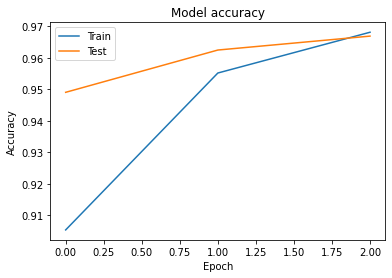

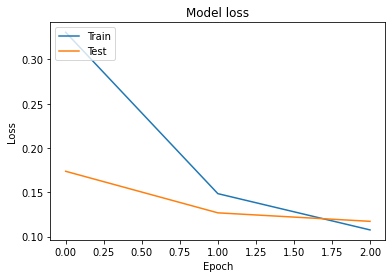

In [9]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [10]:
pred_data = x_test[1:2,:]
pred_label = y_test[1:2,]
result = model.predict(pred_data) #Other parameter : verbose, steps, callbacks, max_queue_size,workers, use_multiprocessing
print("Input : ", pred_data.shape, "Predict Resutl: ",result.shape)
print("Result: ", result)
print("Label : ", pred_label)


Input :  (1, 784) Predict Resutl:  (1, 10)
Result:  [[ -8.361509    -2.3069725    9.459857    -0.35505903 -20.030645
   -4.2215457   -8.576529   -11.529521    -2.0336525  -15.212661  ]]
Label :  [2.]


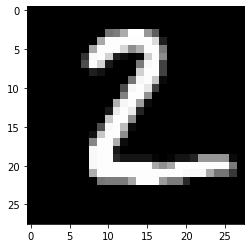

In [11]:
pixels = pred_data
#pixels = np.array(pixels, dtype='uint8')
pixels = pixels.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

##Save the model and Load the model

In [0]:
## Save weights to a TensorFlow Checkpoint file
#model.save_weights('./weights/my_model')
#model.save_weights('my_model.h5', save_format='h5')

## Restore the model's state,
## this requires a model with the same architecture.
#model.load_weights('./weights/my_model')
#model.load_weights('my_model.h5')